In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
%%HTML
<h1>1. BFSK Modulation and Demodulation</h1>

In [3]:
%%HTML
<h3>Digital/Binary input information</h3>

In [4]:
x = np.random.randint(2, size=100)
N = len(x);
Tb = 0.000001;  # Data rate = 1MHz i.e., bit period (second)
print('Binary Input Information at Transmitter: ');
print(x);

Binary Input Information at Transmitter: 
[1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1]


In [5]:
%%HTML
<h3>Represent input information as digital signal</h3>

In [6]:
nb = 99;   # Digital signal per bit
digit = [];
for i in range(0, N):
    if x[i] == 1:
        sig = [1 for g in range(nb)]
    elif x[i] == 0:
        sig = [0 for g in range(nb)]
    digit.extend(sig)

Text(0.5, 1.0, 'Transmitting information as digital signal')

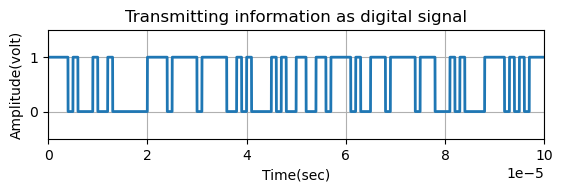

In [7]:
t1 = np.arange(0, nb*N*(Tb/nb), Tb/nb)   # Time period
plt.subplot(3, 1, 1)
plt.plot(t1, digit, linewidth=2)
plt.grid()
plt.axis([0, Tb*N, -0.5, 1.5])
plt.ylabel('Amplitude(volt)')
plt.xlabel('Time(sec)')
plt.title('Transmitting information as digital signal')

In [8]:
%%HTML
<h3>BFSK Modulation</h3>

In [9]:
Ac = 10;     
br = 1/Tb;    # Bit rate
Fc = br*10;   # Carrier frequency
Pc1 = 0;      # Carrier phase for binary input '1'
Pc2 = pi;     # Carrier phase for binary input '0'
t2 = np.arange(Tb/nb, Tb + Tb/nb, Tb/nb);   # Signal time

In [10]:
mod = []
cr1 = []
cr2 = []
for i in range(0, N):
    cr1.extend(Ac * np.cos(2*pi*Fc*t2 + Pc1))
    cr2.extend(Ac * np.cos(2*pi*Fc*t2 + Pc2))
    if x[i] == 1:
        # Modulation signal with carrier signal 1
        y = Ac * np.cos(2*pi*Fc*t2 + Pc1)
    else:
        # Modulation signal with carrier signal 2
        y = Ac * np.cos(2*pi*Fc*t2 + Pc2)
    mod.extend(y)

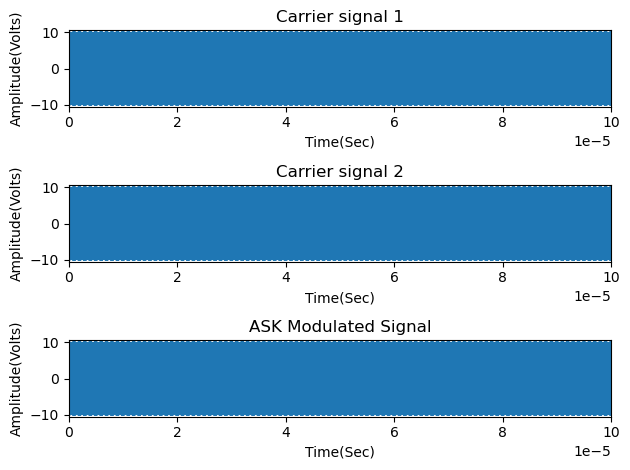

In [11]:
t3 = np.arange(0, Tb * N, Tb/nb);   # Time period
plt.subplot(3, 1, 1)
plt.plot(t3, cr1)
plt.axis([0, Tb*N, -10.5, 10.5])
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.title('Carrier signal 1')
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(t3, cr2)
plt.axis([0, Tb*N, -10.5, 10.5])
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.title('Carrier signal 2')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(t3, mod)
plt.axis([0, Tb*N, -10.5, 10.5])
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.title('ASK Modulated Signal')
plt.tight_layout()
plt.show()

In [12]:
%%HTML
<h3>Transmitted signal x</h3>

In [13]:
Ts = mod;

In [14]:
%%HTML
<h3>Channel model h and w</h3>

In [15]:
h = 1;   # Signal fading
# w = 0;   # Noise
w = np.random.normal(loc=0, scale=1, size=(N * nb));

In [16]:
%%HTML
<h3>Received signal y</h3>

In [17]:
y = np.add(np.multiply(h, Ts), w)  # Convolution

In [18]:
%%HTML
<h3>BFSK Demodulation</h3>

In [19]:
s=len(t2)
demod=[]

In [20]:
for n in range(0, len(y), s):
    t4=np.arange(Tb/nb, Tb + Tb/nb, Tb/nb)  # Time period
    c=np.cos(2*pi*Fc*t4)                    # Carrier signal
    mm=np.multiply(c, y[n:n+s])             # Convolution
    t5=np.arange(Tb/nb, Tb + Tb/nb, Tb/nb)
    z=np.trapz(t5, mm)                      # Intregation
    rz=round((2*z/Tb))
    if rz > Ac/2:                               # Logical condition
        a = 1
    else:
        a = 0
    demod.append(a)

print('Demodulated Binary Information at Receiver: ')
print(demod)

Demodulated Binary Information at Receiver: 
[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]


In [21]:
%%HTML
<h3>Represent demodulated information as digital signal</h3>

In [22]:
bit=[]
for n in range(0, len(demod)):
    if demod[n] == 1:
        se=[1 for i in range(nb)]
    elif demod[n] == 0:
        se=[0 for i in range(nb)]
    bit.extend(se)

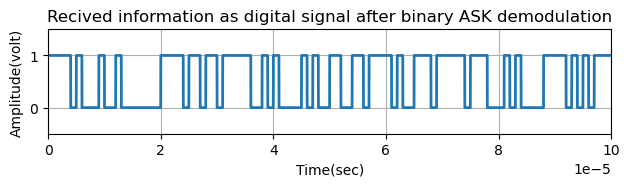

In [23]:
t4=np.arange(0, nb*len(demod)*(Tb/nb), Tb/nb)    # Time period
plt.subplot(3, 1, 1)
plt.plot(t4, bit, linewidth=2);
plt.grid()
plt.axis([0, Tb*len(demod), -0.5, 1.5]);
plt.ylabel('Amplitude(volt)');
plt.xlabel('Time(sec)');
plt.title('Recived information as digital signal after binary ASK demodulation');
plt.tight_layout()
plt.show()

In [24]:
count_error = 0
print("Bit error at:")
for i in range(0, N):
    if x[i] != demod[i]:
        print(i + 1)
        count_error += 1
print(f'Bit error probability: {count_error/len(x)*100}%')


Bit error at:
28
Bit error probability: 1.0%
